In [211]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs ## For creating dataset
from sklearn.model_selection import train_test_split

In [212]:
## Creating Dataset
X,Y = make_blobs(n_samples=1000,n_features=2,centers=3,random_state=23)
# X--Independent Variable
# Y--Dependent Variable(In Clustering we do not have nay use of Dependent Variable 
#                       or in short in real world data we do not have any dependent variable for clustering)

Text(0, 0.5, '1st Feature')

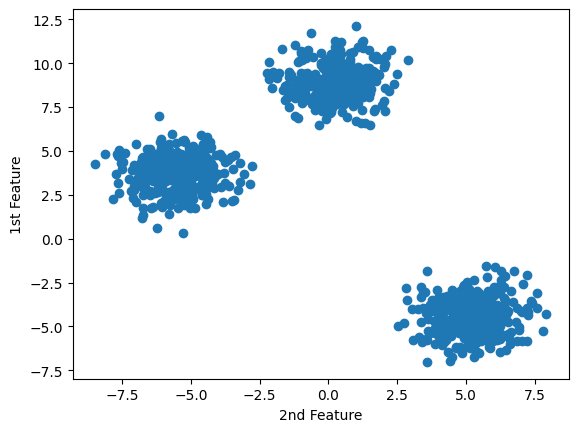

In [213]:
plt.scatter(x=X[:,0],y=X[:,1])
plt.xlabel('2nd Feature')
plt.ylabel('1st Feature')


In [214]:
## Train-Test_Split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [215]:
from sklearn.cluster import KMeans

## Finding Optimal Number of Clusters(K)

### 1.Manual Method


In [216]:
# Finding k Using Elbow Method

wcss = []
for k in range(1,11):
    kmeans_model = KMeans(n_clusters=k,init='k-means++')
    kmeans_model.fit(X_train)
    wcss.append(kmeans_model.inertia_)

print(wcss)

[38942.19694117094, 8820.694152589953, 1475.4321389025883, 1329.710221809035, 1105.603462197511, 963.01388679174, 854.9786884340899, 812.2527238451503, 702.9925337179986, 607.9865323696245]


Text(0, 0.5, 'WCSS')

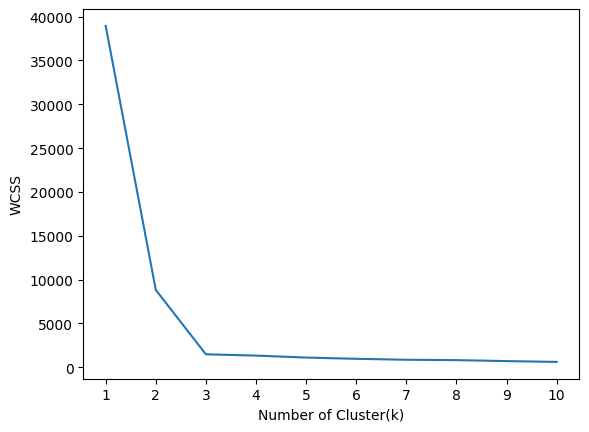

In [217]:
## Printing Elbow Curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of Cluster(k)')
plt.ylabel('WCSS')

#### As we can see after k=3 change in WCSS value is very small and not significant so by elbow method our value of k is k=3

#### Training the Model


In [218]:
kmeans_model_2 = KMeans(n_clusters=3,init='k-means++')
Y_label = kmeans_model_2.fit_predict(X_train)
Y_label_test = kmeans_model_2.predict(X_test)

Text(0, 0.5, '1st Feature')

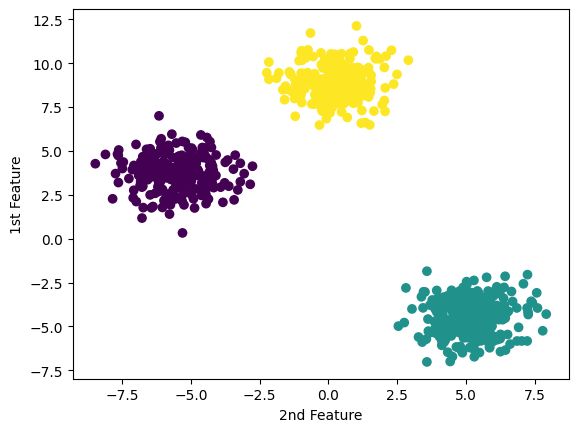

In [219]:
plt.scatter(x=X_train[:,0],y=X_train[:,1],c=Y_label)
plt.xlabel('2nd Feature')
plt.ylabel('1st Feature')

Text(0, 0.5, '1st Feature')

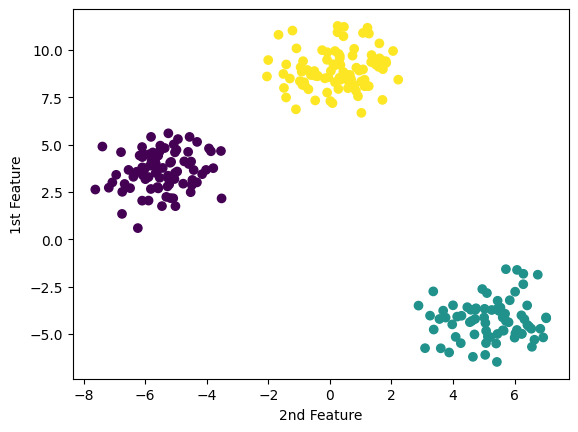

In [220]:
plt.scatter(x=X_test[:,0],y=X_test[:,1],c=Y_label_test)
plt.xlabel('2nd Feature')
plt.ylabel('1st Feature')

### 2.Automated

In [221]:
from kneed import KneeLocator
kl = KneeLocator(x=range(1,11),y=wcss,curve='convex',direction='decreasing')
print('k =',kl.elbow)


k = 3


### Performance Mertrics

In [222]:
## Silhoitte Score
# Finding k Using Elbow Method
from sklearn.metrics import silhouette_score

Silhouette_Coiefficient = []
for k in range(2,11):
    kmeans_model = KMeans(n_clusters=k,init='k-means++')
    kmeans_model.fit(X_train)
    Score = silhouette_score(X_train,kmeans_model.labels_)
    Silhouette_Coiefficient.append(Score)

Silhouette_Coiefficient

[np.float64(0.7285220879328288),
 np.float64(0.8070976381014228),
 np.float64(0.6349275684861594),
 np.float64(0.475891105662656),
 np.float64(0.33581162849261975),
 np.float64(0.3317016674259723),
 np.float64(0.3206678382085308),
 np.float64(0.3489616075319183),
 np.float64(0.33748965687124804)]

#### As we can see above Silhoitte_Coiefficient for K = 3 is maximum hence our choice of k is absolutely right

Text(0, 0.5, 'Silhouette_Coiefficient')

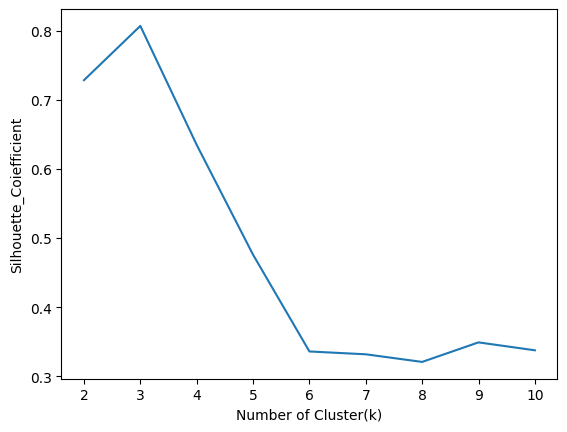

In [223]:
plt.plot(range(2,11),Silhouette_Coiefficient)
plt.xticks(range(2,11))
plt.xlabel('Number of Cluster(k)')
plt.ylabel('Silhouette_Coiefficient')